# Experiment 3

Uniformly distributed $x_i$.

$$
\begin{align}
f(X) & = A \cdot X + b; \\ 
m & \ge 2; \\
s & = 5; \\
Z & = N(0, \sigma^2).
\end{align}
$$

This is an experiment that linear regression should be
very good at. $F$ is a linear function of $X$, there are a small number of
features, no confounding features, and normally distributed noise. If the
world was all like this, we would have no need for anything other than 
linear regression.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import impactstudy.experiment as ise

## Configuration

In [2]:
N = 250

In [3]:
M = list(range(2, 11, 2))

In [4]:
S = 5

In [5]:
SIGMA = 20.0

## A Single Scenario For Manual Verification.

### Set Up the Scenario

In [6]:
experiment0 = ise.LinearWithNoiseExperiment(m=M[1], s=S, sigma=SIGMA)

### Generate Impact Charts

In [7]:
tags, scenario = next(experiment0.scenarios())

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


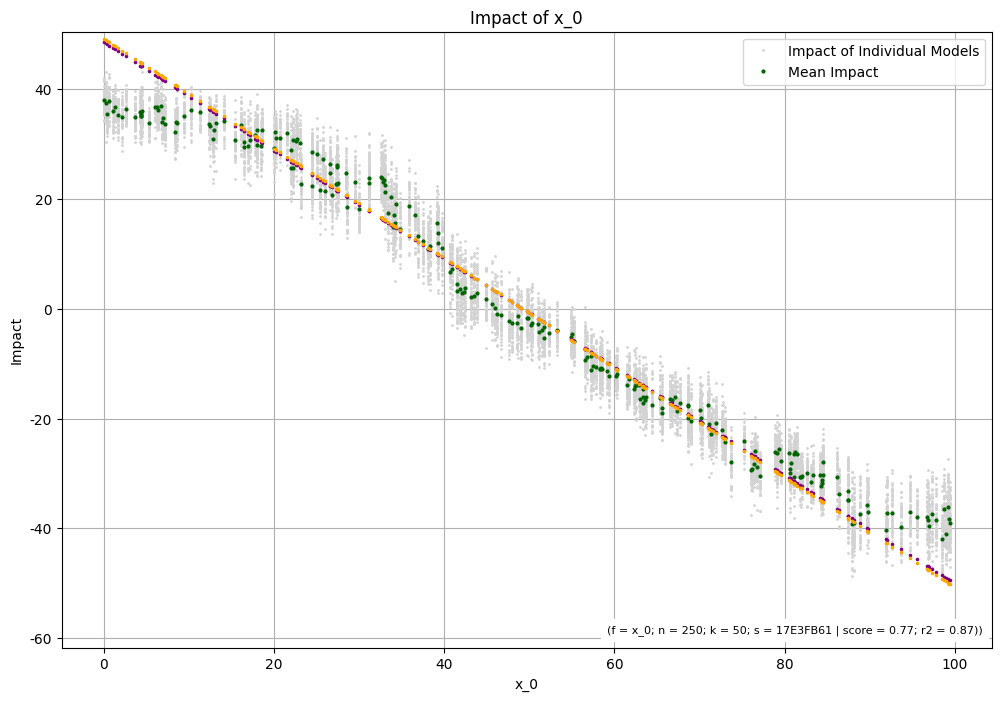

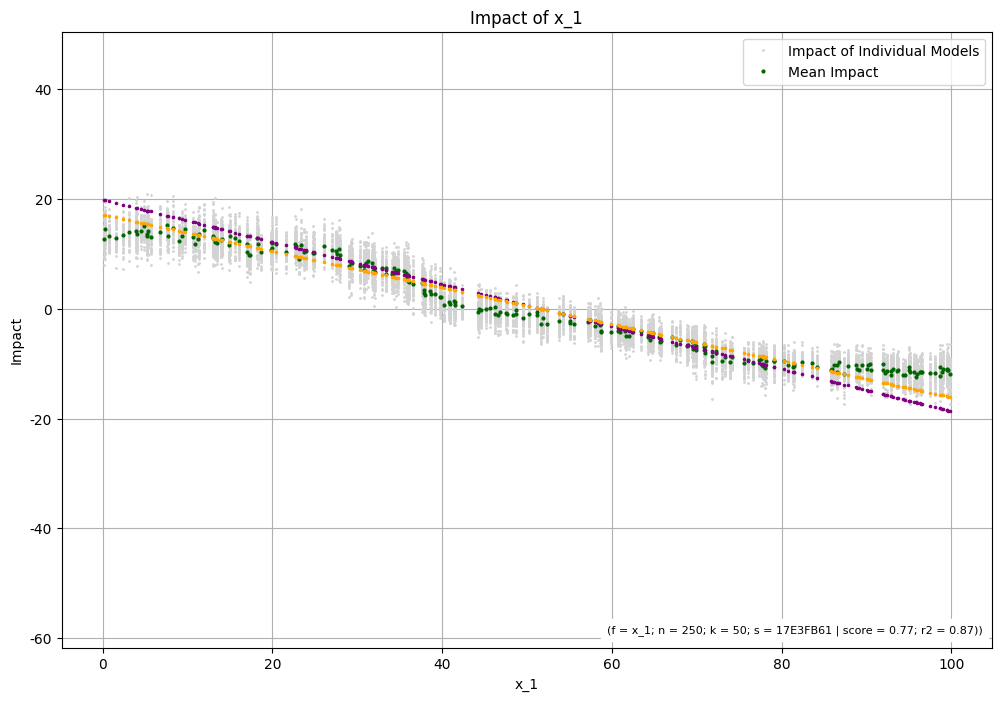

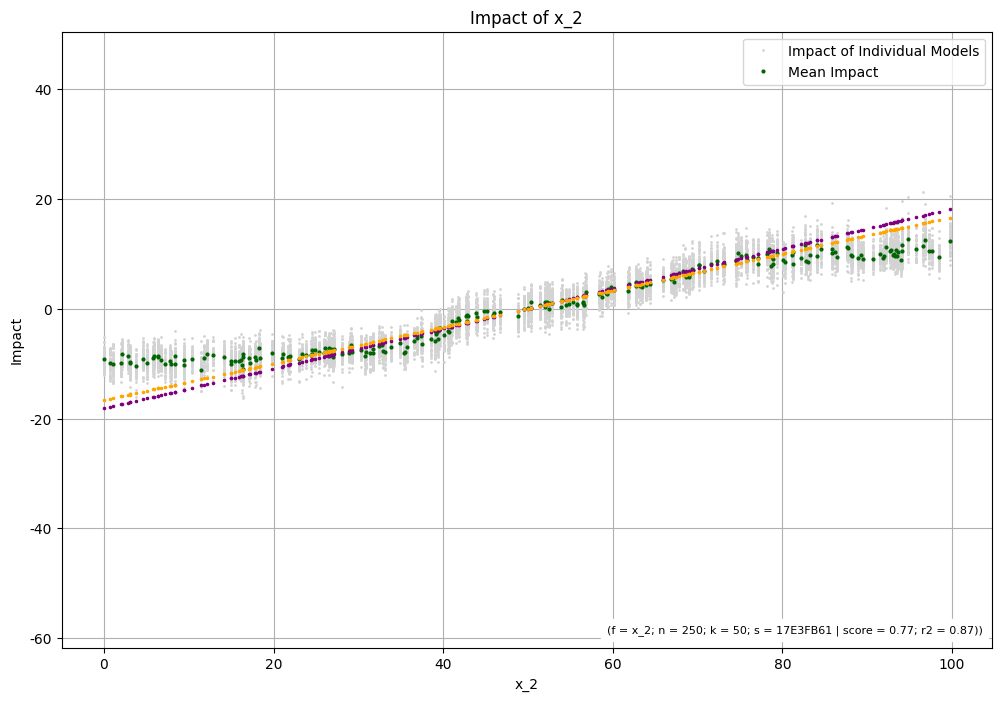

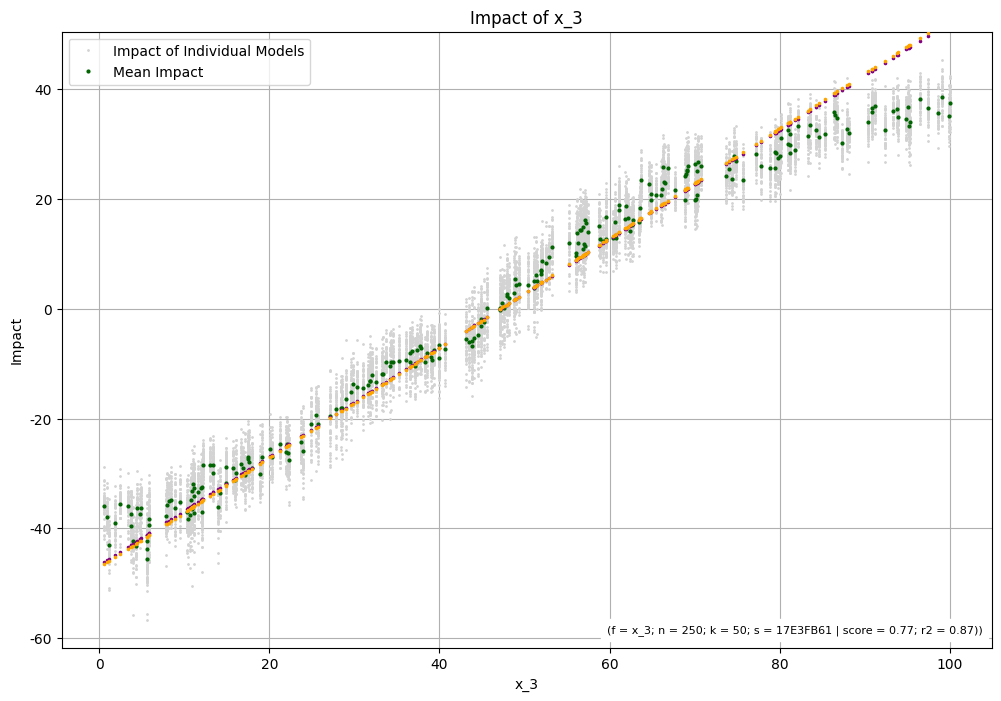

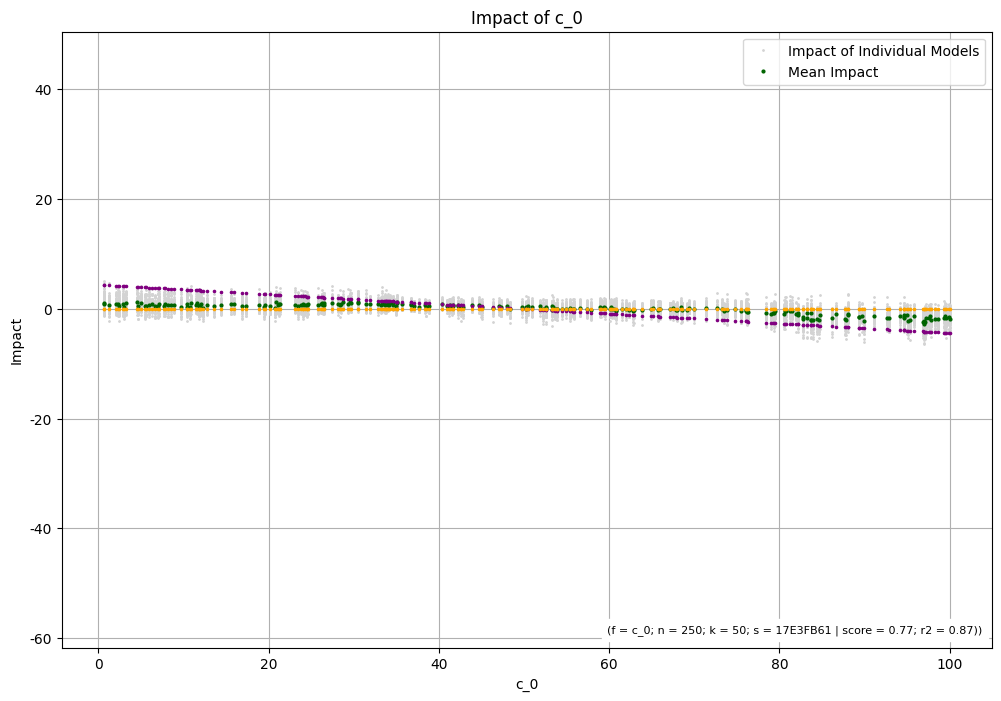

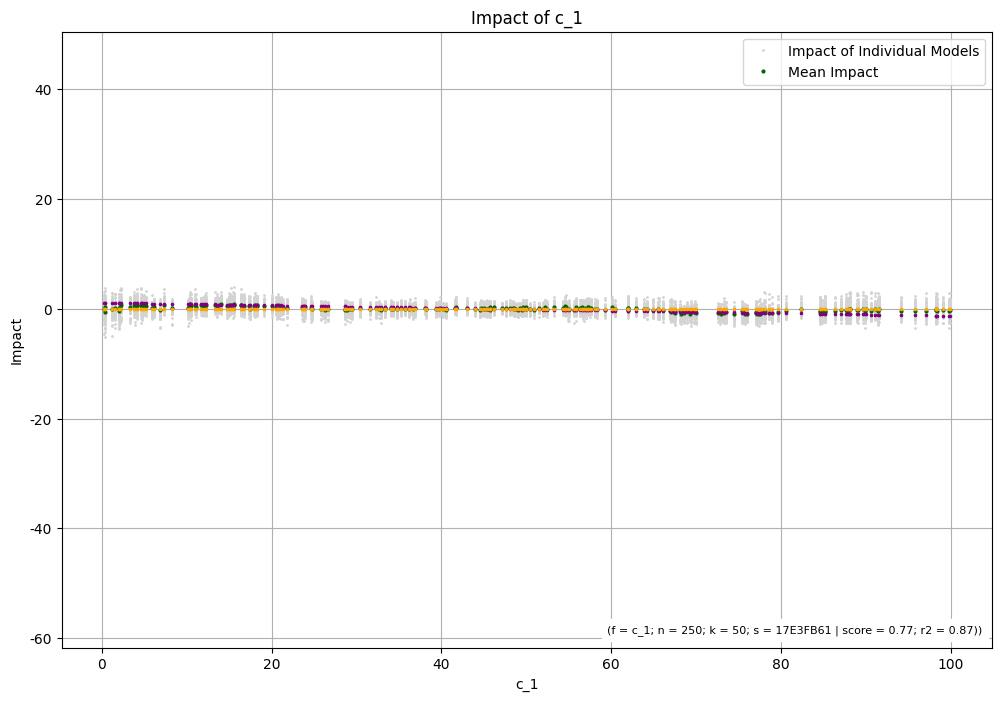

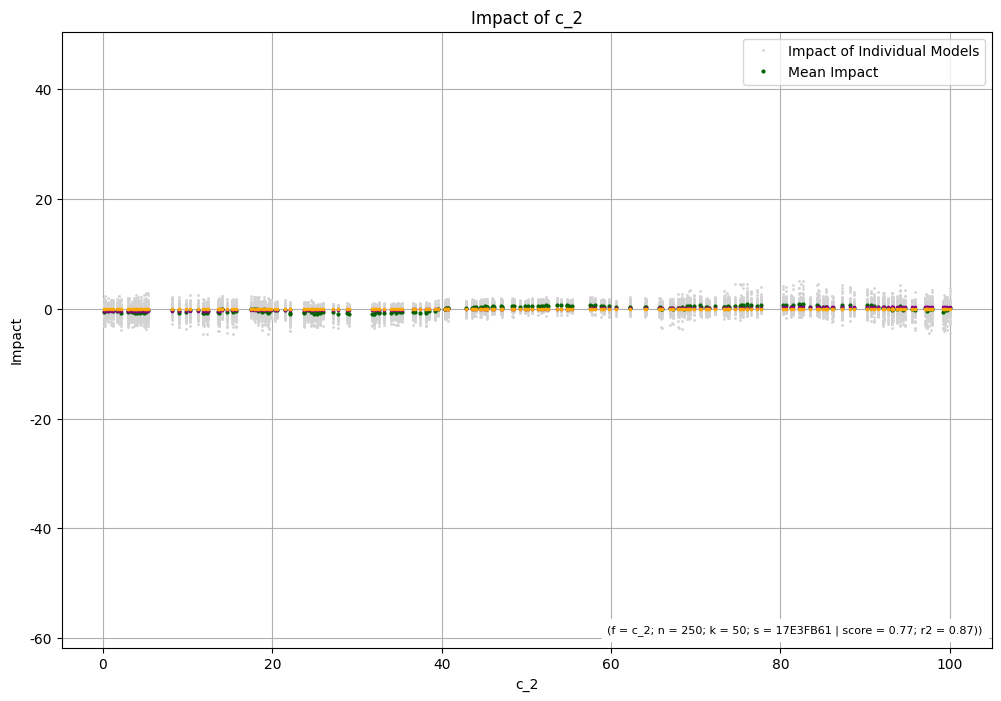

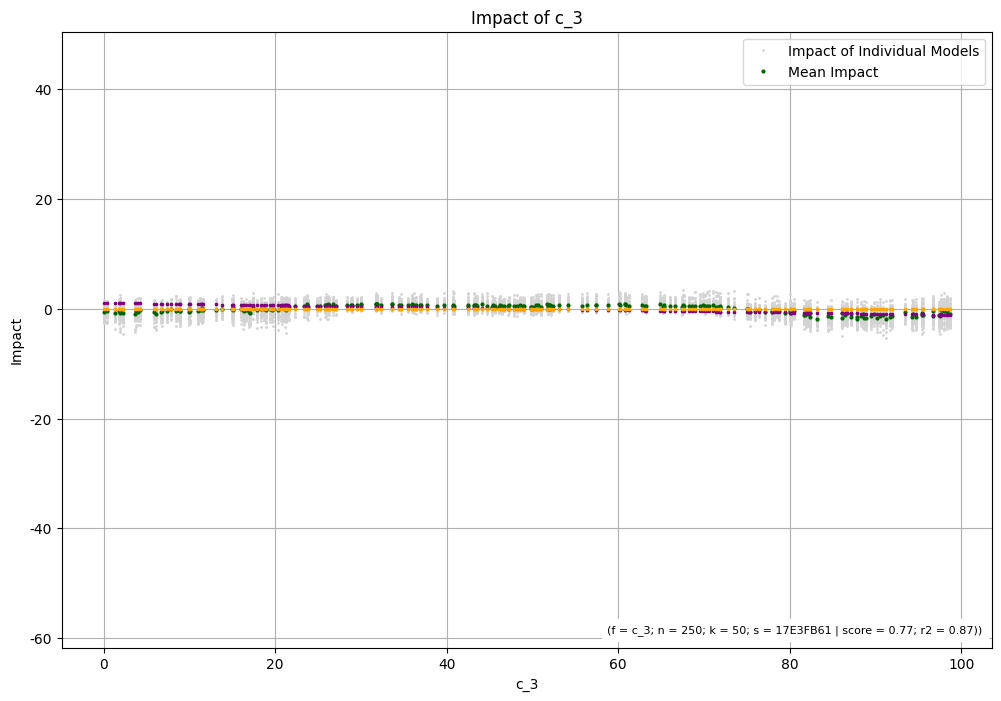

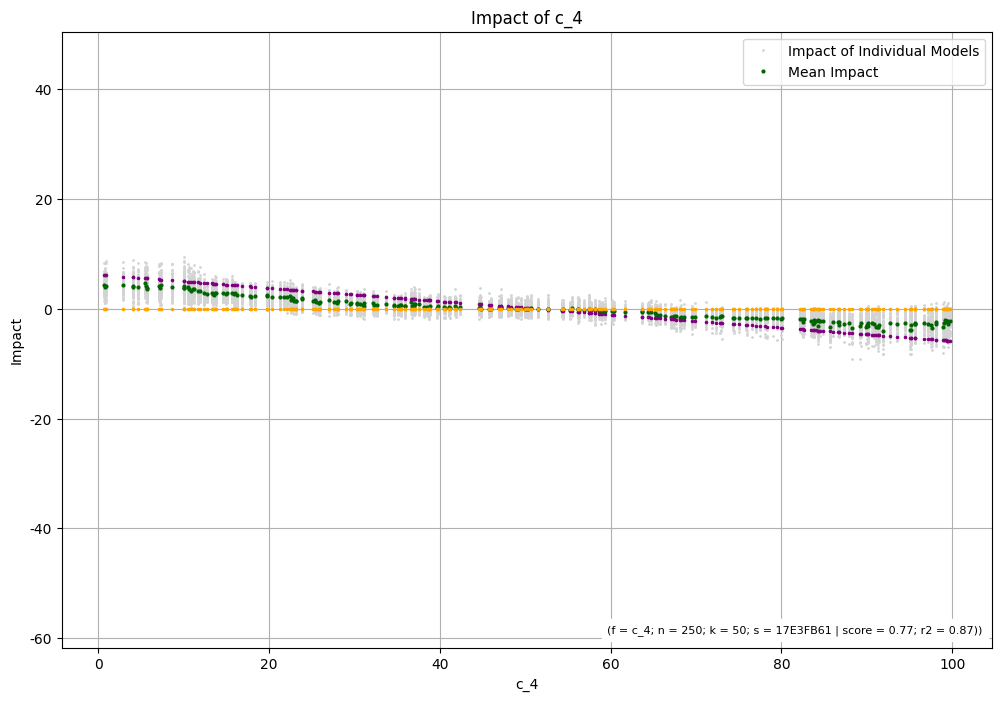

In [8]:
impact_charts = scenario.model_impact_charts(N, linreg_overlay=True)

### Generate Metrics

In [9]:
scenario.model_errors(N, linreg_errors=True)

,metric,x_0,x_1,x_2,x_3,c_0,c_1,c_2,c_3,c_4,mu_x_i,mu_c_i
0,RMSE,4.760756,1.869018,2.515394,4.627655,0.941681,0.411403,0.470220,0.723372,2.129244,3.443206,0.935184
0,MAE,3.619506,1.503562,1.770212,3.360727,0.755064,0.318846,0.409968,0.623251,1.729395,2.563502,0.767305
0,MED_AE,2.619789,1.372805,1.055688,2.414268,0.698283,0.259838,0.412901,0.571906,1.615718,1.865638,0.711729
0,LR_RMSE,0.364961,1.531634,0.854936,0.248090,2.570964,0.662018,0.252185,0.634688,3.532778,0.749905,1.530527
0,LR_MAE,0.316248,1.336541,0.743036,0.212780,2.223211,0.564495,0.219226,0.552978,3.088344,0.652151,1.329651
0,LR_MED_AE,0.304522,1.265838,0.712061,0.205917,2.228187,0.547990,0.216246,0.573942,3.141904,0.622084,1.341654


In [10]:
scenario.linreg_r2(N)

0.8411454380785506

## A Multi-Scenario Experiment

In [11]:
experiment = ise.LinearWithNoiseExperiment(m=M, s=S, sigma=SIGMA)

In [12]:
df_model_errors = experiment.model_errors(N, linreg_errors=True)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [13]:
df_model_errors

,metric,x_0,x_1,c_0,c_1,c_2,c_3,c_4,mu_x_i,mu_c_i,...,IM_R2,LR_R2,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9
0,RMSE,5.293355,4.243413,1.251398,0.147201,0.326929,0.137763,0.218542,4.768384,0.416367,...,0.844090,0.805864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,MAE,4.062135,3.287244,0.758759,0.111937,0.195921,0.097803,0.180716,3.674689,0.269027,...,0.844090,0.805864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,MED_AE,3.172408,2.691941,0.541161,0.089149,0.125054,0.069977,0.170307,2.932174,0.199130,...,0.844090,0.805864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,LR_RMSE,1.561217,0.393356,2.625202,0.278203,1.221776,0.174890,1.742309,0.977286,1.208476,...,0.844090,0.805864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,LR_MAE,1.350301,0.331495,2.269528,0.240128,1.056323,0.152512,1.535360,0.840898,1.050770,...,0.844090,0.805864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,LR_MED_AE,1.266862,0.297627,2.263856,0.244209,1.056033,0.150404,1.503509,0.782244,1.043602,...,0.844090,0.805864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,RMSE,4.760756,1.869018,0.941681,0.411403,0.470220,0.723372,2.129244,3.443206,0.935184,...,0.874231,0.841145,2.515394,4.627655,NaN,NaN,NaN,NaN,NaN,NaN
0,MAE,3.619506,1.503562,0.755064,0.318846,0.409968,0.623251,1.729395,2.563502,0.767305,...,0.874231,0.841145,1.770212,3.360727,NaN,NaN,NaN,NaN,NaN,NaN
0,MED_AE,2.619789,1.372805,0.698283,0.259838,0.412901,0.571906,1.615718,1.865638,0.711729,...,0.874231,0.841145,1.055688,2.414268,NaN,NaN,NaN,NaN,NaN,NaN
0,LR_RMSE,0.364961,1.531634,2.570964,0.662018,0.252185,0.634688,3.532778,0.749905,1.530527,...,0.874231,0.841145,0.854936,0.248090,NaN,NaN,NaN,NaN,NaN,NaN


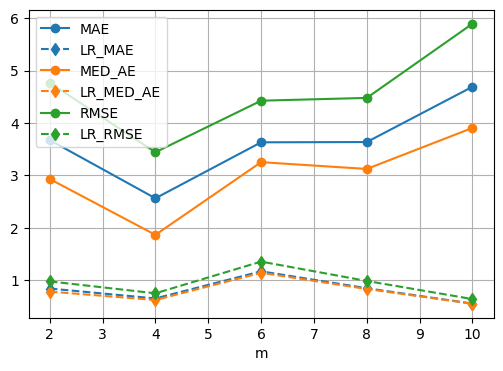

In [14]:
ax = experiment.plot_model_errors(N, x_col="m", y_col="mu_x_i", figsize=(6, 4))

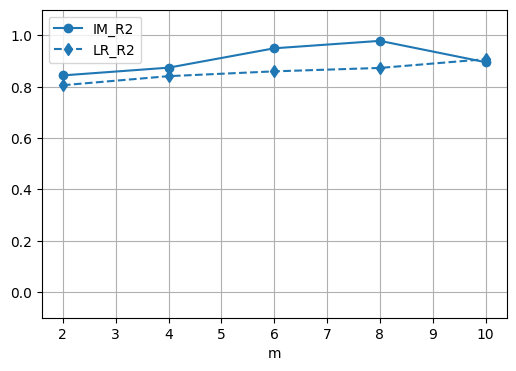

In [15]:
ax = experiment.plot_r2(N, x_col="m", figsize=(6, 4))